In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("AirPassengers.csv",parse_dates=['Month'],index_col=['Month'])

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
ts=df.Passengers
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

<Axes: xlabel='Month'>

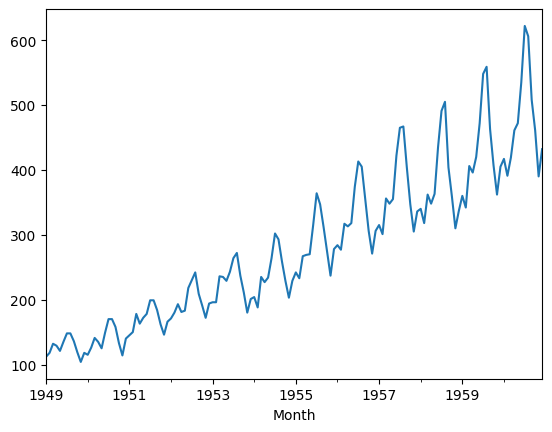

In [6]:
ts.plot() # Non stationary so wee need to convert into stationary 

In [7]:
import statsmodels.api as sm

In [11]:
decompostion=sm.tsa.seasonal_decompose(ts)
decompostion

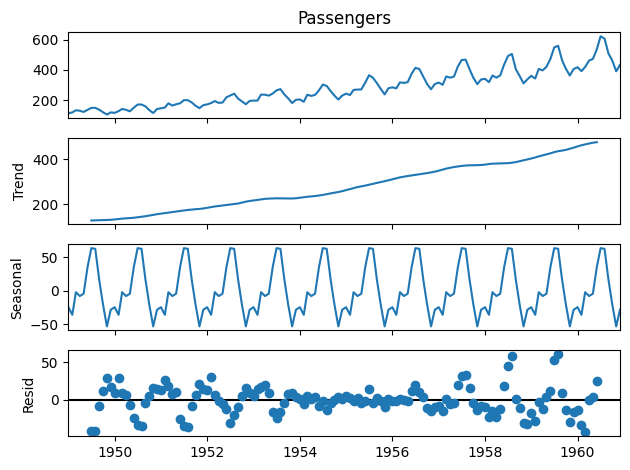

In [12]:
fig=decompostion.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adftest=adfuller(ts)
adftest

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [20]:
print("p values :",adftest[1])

p values : 0.9918802434376411


In [21]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [22]:
ts1=df.Passengers.diff().dropna()
ts1

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 143, dtype: float64

In [23]:
adftest=adfuller(ts1)
adftest

(-2.829266824169992,
 0.0542132902838265,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [24]:
print("p value :",adftest[1])

p value : 0.0542132902838265


In [25]:
ts2=ts1.diff().dropna()
ts2

Month
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
1949-06-01     22.0
1949-07-01     -1.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers, Length: 142, dtype: float64

In [26]:
adftest=adfuller(ts2)
adftest

(-16.384231542468527,
 2.732891850014085e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.60204172756)

<Axes: xlabel='Month'>

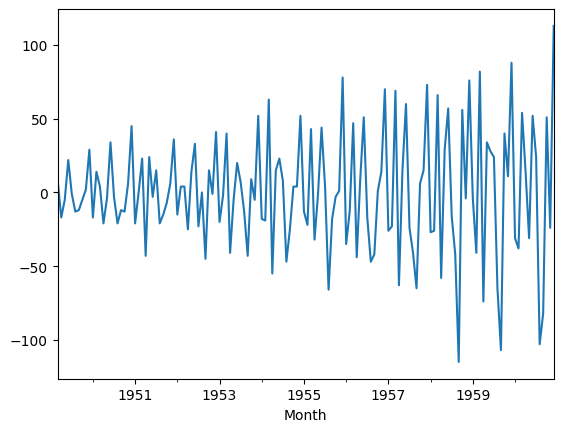

In [28]:
ts2.plot() # so now it look like staionary 

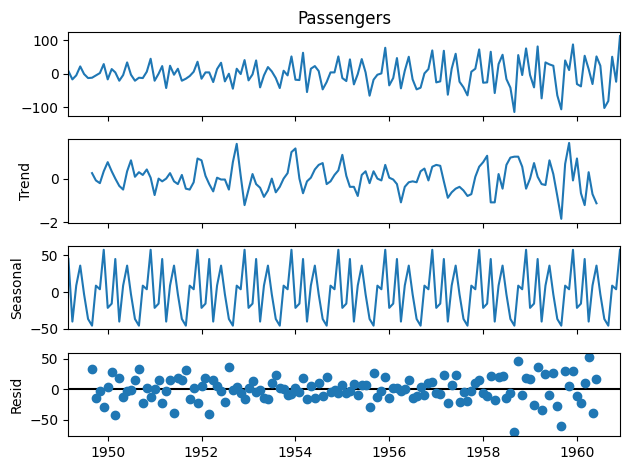

In [29]:
decomposition = sm.tsa.seasonal_decompose(ts2)
fig = decomposition.plot()
plt.show()

In [30]:
len(ts2)

142

In [31]:
train=ts2[:120]
print("Traning data length",len(train))
test=ts2[120:]
print("Testing dat length",len(test))

Traning data length 120
Testing dat length 22


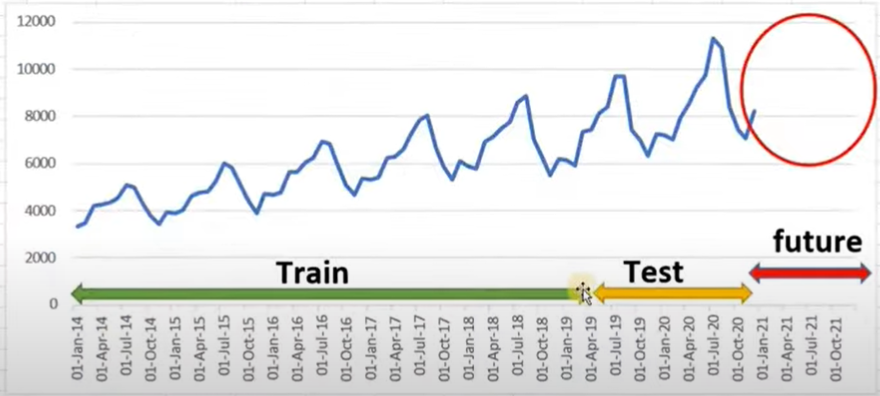

## ARIMA Model Building

#### Arima model has three components 
- 1. AR
- 2. MA
- 3. Integerated

For building ARIMA model we need the 
- AR order p
- MA order q
- Integerated order d

### Hyperparameters of ARIMA model (p,d,q)

# Build AIRMA model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
model=ARIMA(train,order=[7,0,1]).fit()

C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
len(ts2)

142

In [36]:
pred=model.predict(start=120,end=141)
pred

1959-03-01    -0.581914
1959-04-01   -41.680423
1959-05-01    47.060382
1959-06-01     0.810735
1959-07-01    15.476383
1959-08-01   -10.681914
1959-09-01   -23.484223
1959-10-01     8.875380
1959-11-01    -9.721907
1959-12-01    23.811686
1960-01-01    -4.830414
1960-02-01    -1.146389
1960-03-01    -4.974354
1960-04-01    -9.145223
1960-05-01     9.400226
1960-06-01    -2.826366
1960-07-01     8.250387
1960-08-01    -4.933535
1960-09-01    -2.624225
1960-10-01    -0.474030
1960-11-01    -2.709442
1960-12-01     5.632498
Freq: MS, Name: predicted_mean, dtype: float64

# Model EVALUATION

In [37]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred,test))

54.6815108331892

In [38]:
test.mean(), np.sqrt(test.var())

(2.727272727272727, 62.76500527719159)

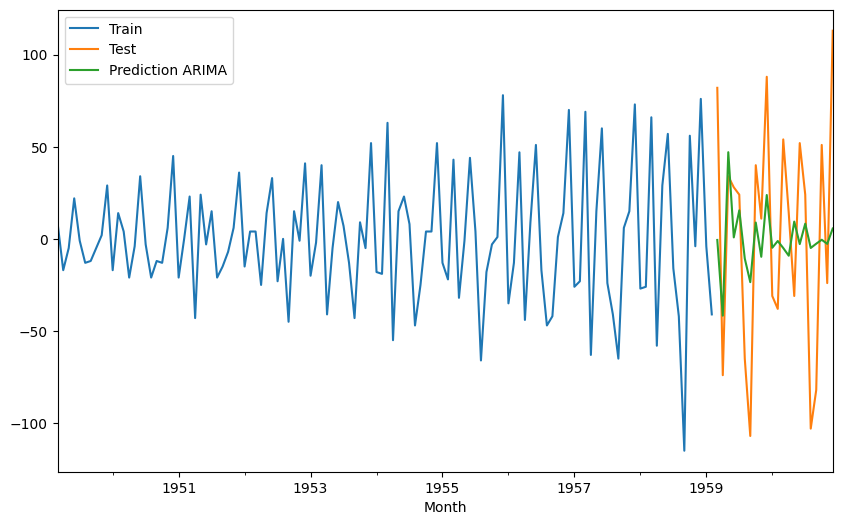

In [41]:
train.plot(label='Train', figsize=(10, 6))   # 0-119 => 120
test.plot(label='Test')                      # 120-141 => 22
pred.plot(label='Prediction ARIMA')          # 120-141 => 22

plt.legend()  # Explicitly add the legend here
plt.show()


# Final Model

In [42]:
len(ts2),len(ts2)+6

(142, 148)

C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AttributeError: 'Legend' object has no attribute 'legendHandles'

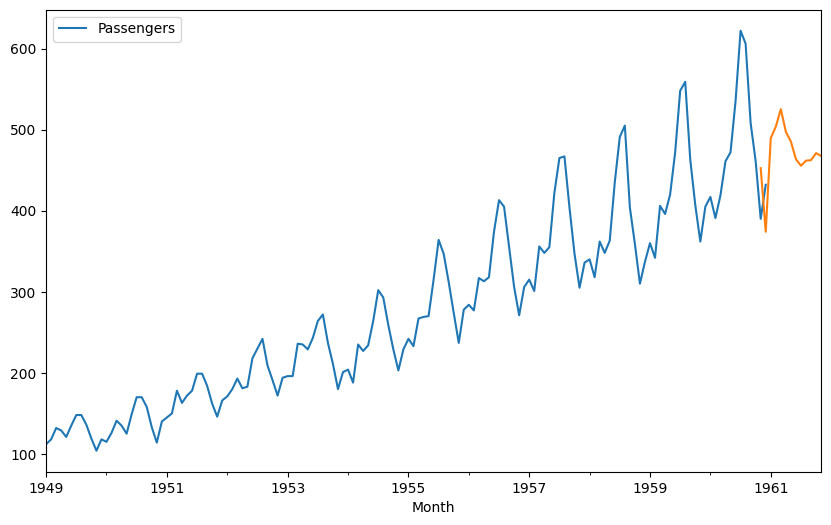

In [45]:
finalmodel = ARIMA(df,order=(7,0,1)).fit()
prediction=finalmodel.predict(142,len(df)+10)
df.plot(legend=True,label='Train',figsize=(10,6))
prediction.plot(legend=True, label='prediction')

### How to get ARIMA Hyperparameters pdq

In [46]:
import itertools

In [47]:
p=range(0,8)
d=range(0,8)
q= range(0,2)

In [48]:
list(p), list(d), list(q)

([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1])

In [49]:
pdq_combinations  = list(itertools.product(p,d,q))

In [50]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (0, 2, 0),
 (0, 2, 1),
 (0, 3, 0),
 (0, 3, 1),
 (0, 4, 0),
 (0, 4, 1),
 (0, 5, 0),
 (0, 5, 1),
 (0, 6, 0),
 (0, 6, 1),
 (0, 7, 0),
 (0, 7, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (1, 2, 0),
 (1, 2, 1),
 (1, 3, 0),
 (1, 3, 1),
 (1, 4, 0),
 (1, 4, 1),
 (1, 5, 0),
 (1, 5, 1),
 (1, 6, 0),
 (1, 6, 1),
 (1, 7, 0),
 (1, 7, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (2, 2, 0),
 (2, 2, 1),
 (2, 3, 0),
 (2, 3, 1),
 (2, 4, 0),
 (2, 4, 1),
 (2, 5, 0),
 (2, 5, 1),
 (2, 6, 0),
 (2, 6, 1),
 (2, 7, 0),
 (2, 7, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1),
 (3, 2, 0),
 (3, 2, 1),
 (3, 3, 0),
 (3, 3, 1),
 (3, 4, 0),
 (3, 4, 1),
 (3, 5, 0),
 (3, 5, 1),
 (3, 6, 0),
 (3, 6, 1),
 (3, 7, 0),
 (3, 7, 1),
 (4, 0, 0),
 (4, 0, 1),
 (4, 1, 0),
 (4, 1, 1),
 (4, 2, 0),
 (4, 2, 1),
 (4, 3, 0),
 (4, 3, 1),
 (4, 4, 0),
 (4, 4, 1),
 (4, 5, 0),
 (4, 5, 1),
 (4, 6, 0),
 (4, 6, 1),
 (4, 7, 0),
 (4, 7, 1),
 (5, 0, 0),
 (5, 0, 1),
 (5, 1, 0),
 (5,

In [51]:
rmse=[]
order1 = []
import warnings
warnings.filterwarnings('ignore')

In [52]:
for pdq in pdq_combinations:    
    model=ARIMA(train,order=pdq).fit()
    pred = model.predict(start=120,end=141)
    error = np.sqrt(mean_squared_error(test,pred))
    print(error)
    order1.append(pdq)
    rmse.append(error)

61.391767487721225
60.36022384673035
75.31569919647924
61.391806647020566
528.888500021073
78.26341418059422
4686.872416169855
541.9209611314727
175463.94619446824
4810.045797793532
2575442.932593418
183153.65867564097
29659320.196588453
2671273.4271604214
293515371.51669025
30612189.32065233
60.79406685531961
60.8264868717698
68.40646366216247
60.815298808472285
753.2235169031018
69.87211619623847
6004.654235922605
797.602770636186
19605.86966966781
6516.410124685568
121145.08456082133
19901.00956427929
1311234.3051944387
122110.435908798
277007.5895316502
1333068.957249093
61.26805180021934
61.67709212546585
60.44670433871869
61.27583244755173
383.6725843181297
60.51181111186144
2779.173248741946
415.7259961850192
24121.102933616563
2985.213394484612
444429.0872728116
26328.51000237854
2974854.4510944774
463452.2268558526
14745673.745317964
3075900.7790317526
62.21366727994337
61.39264545261761
60.793098895251624
62.161397867466434
334.9083620034793
60.786854512784046
4538.4856288066

In [53]:
result = pd.DataFrame(index=order1,data=rmse,columns=['rmse'])
result

,rmse
"(0, 0, 0)",6.139177e+01
"(0, 0, 1)",6.036022e+01
"(0, 1, 0)",7.531570e+01
"(0, 1, 1)",6.139181e+01
"(0, 2, 0)",5.288885e+02
...,...
"(7, 5, 1)",1.207911e+08
"(7, 6, 0)",8.754716e+04
"(7, 6, 1)",4.745721e+04
"(7, 7, 0)",9.334614e+05


In [55]:
result.rmse.sort_values() # the first values we select because it have low error

(7, 0, 1)    5.468151e+01
(7, 1, 0)    5.469396e+01
(7, 2, 1)    5.471259e+01
(6, 1, 0)    5.493354e+01
(6, 2, 1)    5.501808e+01
                 ...     
(2, 7, 0)    1.474567e+07
(0, 6, 0)    2.965932e+07
(0, 7, 1)    3.061219e+07
(7, 5, 1)    1.207911e+08
(0, 7, 0)    2.935154e+08
Name: rmse, Length: 128, dtype: float64